In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def factorial(n):
    if n == 1:
        return 1
    else:
        return n*factorial(n-1)

def polarization(T, E):
    N = 1
    u = 1
    k = 1
    m = 1
    a = 1
    h = 1
    beta = k*T
    
    factor1 = (factorial(N)**-1)*(a**2*(2*np.pi*m/beta)**1.5*(4*np.pi**2*m*k*T)/(beta*h**5))**N
    factor2 = u*(np.sinh(u*E*beta)/(u*E*beta))**(N-1)
    factor3 = (np.cosh(u*E*beta)/E - np.sinh(u*E*beta)/(u**beta*E**2))
    
    return factor1*factor2*factor3    

In [3]:
N = 100
T = np.logspace(-2, 1, N)
E = np.logspace(-2, 1, N)

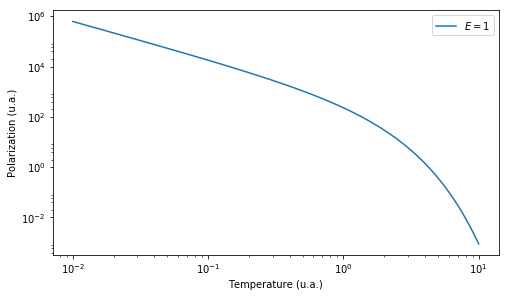

In [4]:
P = polarization(T, 1)
plt.figure(figsize=(8,4.5))
plt.loglog(T, P, label="$E = 1$")

plt.xlabel("Temperature (u.a.)")
plt.ylabel("Polarization (u.a.)")
plt.legend()
plt.savefig("Temperature.pdf")
plt.show()

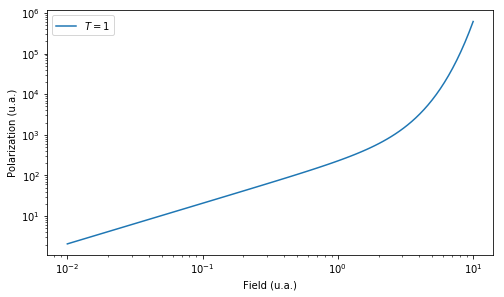

In [5]:
P = polarization(1, E)
plt.figure(figsize=(8,4.5))
plt.loglog(E, P, label = "$T = 1$")

plt.xlabel("Field (u.a.)")
plt.ylabel("Polarization (u.a.)")

plt.legend()
plt.savefig("Field.pdf")
plt.show()

In [6]:
TT, EE = np.meshgrid(T, E)

In [7]:
PP = polarization(TT, EE)

/home/juan/.anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10


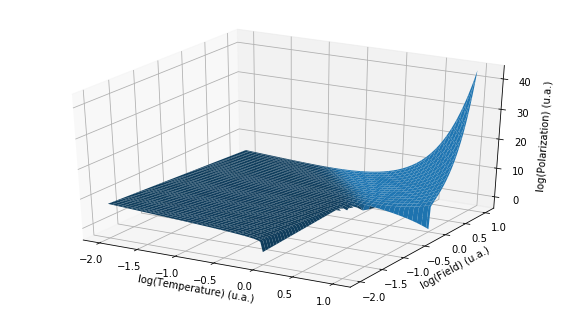

In [8]:
fig = plt.figure(figsize=(8, 4.5))
ax = fig.gca(projection='3d')

ax.plot_surface(np.log10(TT), np.log10(EE), np.log10(PP))

ax.set_xlabel("log(Temperature) (u.a.)")
ax.set_ylabel("log(Field) (u.a.)")
ax.set_zlabel("log(Polarization) (u.a.)")
plt.tight_layout()

plt.savefig("Both.pdf")
plt.show()

In [9]:
import sympy as spy
spy.init_printing()

In [10]:
N, V, a, m, h, beta, E, mu, T = spy.symbols(r"N V a m h \beta E \mu T")

Z0 = (1/spy.factorial(N))*(V*a**2*(2*spy.pi*m/(beta*h**2))**(3/2)*4*spy.pi**2*m/(beta*h**2))**N

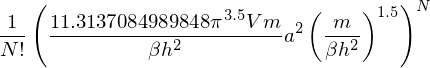

In [11]:
Z0

In [12]:
P = Z0/beta * ((spy.sinh(beta*E*mu)/(beta*mu*E))**N).diff(E)

In [13]:
X = P.diff(E)

In [14]:
X_simp = X.subs({N : 1, V:1, a:1, m:1, h:1, mu:1, beta:1/T}).simplify()

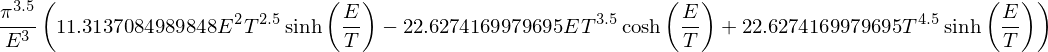

In [15]:
X_simp

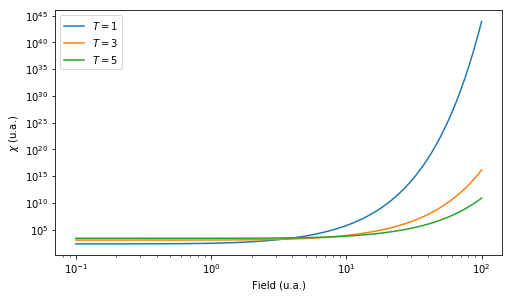

In [16]:
N = 100
T_ = np.linspace(1, 5, 3)
E_ = np.logspace(-1, 2, N)

plt.figure(figsize=(8,4.5))
for t in T_:
    val = []
    temp = X_simp.subs({T: t})
    for e in E_:
        val.append(temp.subs({E: e}))
        
    plt.loglog(E_, val, label = "$T = %d$"%t)
    
plt.ylabel("$\chi$ (u.a.)")
plt.xlabel("Field (u.a.)")
plt.legend()

plt.savefig("Susceptibility.pdf")
plt.show()

In [17]:
N, V, a, m, h, beta, E, mu, T = spy.symbols(r"N V a m h \beta E \mu T")

Z0 = (1/spy.factorial(N))*(V*a**2*(2*spy.pi*m/(beta*h**2))**(3/2)*4*spy.pi**2*m/(beta*h**2))**N
ugly = ((spy.sinh(beta*E*mu)/(beta*mu*E))**N).diff(E).simplify().diff(E)

In [18]:
print(spy.latex(ugly))

\frac{N^{2} \beta \mu \left(\frac{\sinh{\left (E \beta \mu \right )}}{E \beta \mu}\right)^{N}}{\sinh{\left (E \beta \mu \right )}} \left(\frac{1}{E} \cosh{\left (E \beta \mu \right )} - \frac{\sinh{\left (E \beta \mu \right )}}{E^{2} \beta \mu}\right) \left(\frac{E \beta \mu}{\tanh{\left (E \beta \mu \right )}} - 1\right) + \frac{N}{E} \left(\frac{\sinh{\left (E \beta \mu \right )}}{E \beta \mu}\right)^{N} \left(- \frac{E \beta^{2} \mu^{2} \left(- \tanh^{2}{\left (E \beta \mu \right )} + 1\right)}{\tanh^{2}{\left (E \beta \mu \right )}} + \frac{\beta \mu}{\tanh{\left (E \beta \mu \right )}}\right) - \frac{N}{E^{2}} \left(\frac{\sinh{\left (E \beta \mu \right )}}{E \beta \mu}\right)^{N} \left(\frac{E \beta \mu}{\tanh{\left (E \beta \mu \right )}} - 1\right)
